# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


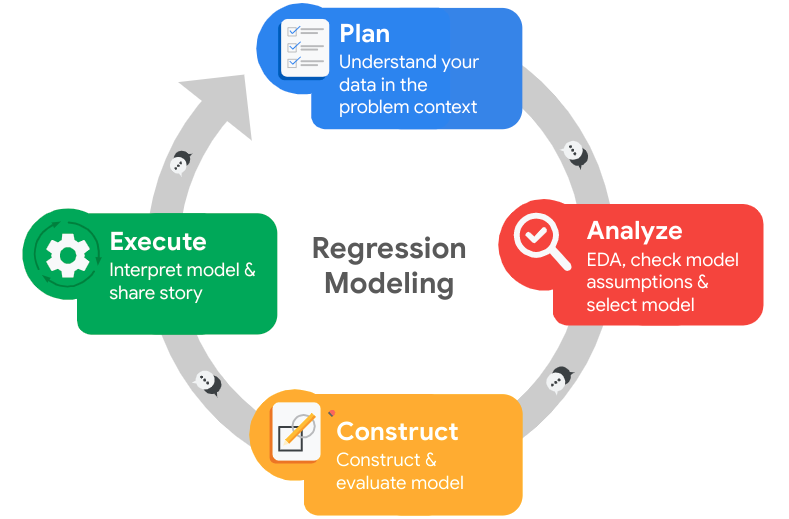

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* Leadership at Salifort wants to stop employee retention. 
* I will develop a machine learning prediction model that can identify a employe that could leave.
* Also, identify potential reasons behind employment turnover.
* 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score, confusion_matrix, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.cluster import KMeans
from xgboost import XGBClassifier as XGB

from xgboost import plot_importance

import pickle
import dataframe_image as dfi
import shap
shap.initjs()

c:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(20)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [22]:
# Rename columns as needed
df0 = df0.rename(columns = {'Department':'department', 'promotion_last_5years':'promotion_last_5_years','Work_accident':'work_accident','time_spend_company':'tenure','number_project':'number_of_project','average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [23]:
# Check for missing values
df0.isna().sum()

satisfaction_level        0
last_evaluation           0
number_of_project         0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [24]:
# Check for duplicates
df0.duplicated().sum()
#df0.drop_duplicates()


3008

In [25]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [26]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

print(df1.shape)
# Display first few rows of new dataframe as needed
df1.head()


(11991, 10)


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

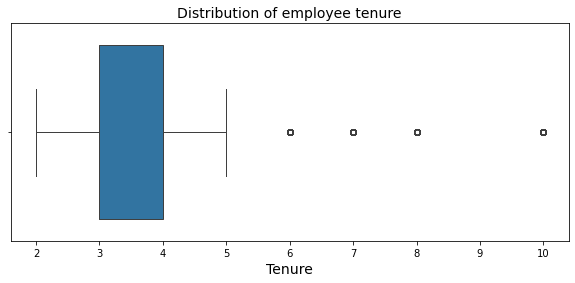

In [27]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,4))
sns.boxplot(df1['tenure'], orient='h')
plt.xlabel('Tenure',fontsize=14)
plt.title('Distribution of employee tenure',fontsize=14)
plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
# Get numbers of people who left vs. stayed
display(df1.groupby('left')['left'].count())

# Get percentages of people who left vs. stayed
df1['left'].value_counts(' ')*100

left
0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [29]:
# Create a plot as needed
df1.info()
df1.head()
#plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_of_project       11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   department              11991 non-null  object 
 9   salary                  11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


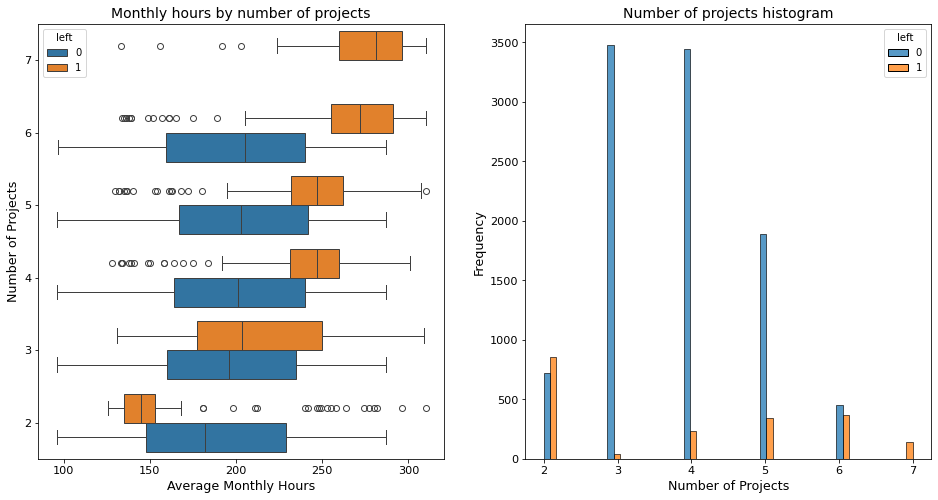

In [30]:
# Create a plot as needed
fs=14
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=df1 , x='average_monthly_hours', y='number_of_project', hue='left', orient="h", ax=axs[0])
axs[0].invert_yaxis()
axs[0].set_title('Monthly hours by number of projects', fontsize=fs)
axs[0].set_xlabel('Average Monthly Hours', fontsize=fs*0.9)
axs[0].set_ylabel('Number of Projects', fontsize=fs*0.9)
axs[0].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[0].tick_params(axis='both', which='minor', labelsize=fs*0.8)

sns.histplot(data=df1, x='number_of_project',hue='left', multiple='dodge', ax=axs[1])
axs[1].set_title('Distribution of Employees working on number of projects')
axs[1].set_title('Number of projects histogram', fontsize=fs)
axs[1].set_xlabel('Number of Projects', fontsize=fs*0.9)
axs[1].set_ylabel('Frequency', fontsize=fs*0.9)
axs[1].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[1].tick_params(axis='both', which='minor', labelsize=fs*0.8)


# Adjust layout
# plt.suptitle('Distribution of Number of Projects Each Employee worked on',fontsize=fs*1.2)
# plt.tight_layout()

plt.savefig('Figures/Number of Projects Distribution.png', format='png', dpi=300, bbox_inches='tight')
# Show the plots
plt.show()

In box plots,
* Employees who worked on 7 projects left, they worked higher hours.
* Employees who worked for higher monthly hours and higher project no. left.
* Also employees with lower working hours might be employees on notics.
In histogram
* Ratio of employees left is high for employees working on higher number of projects

The number of hours that an employee works is `50 weeks * 40 hours per week / 12 months = 166.67 hours per month`
This implies that employees here are overworked.

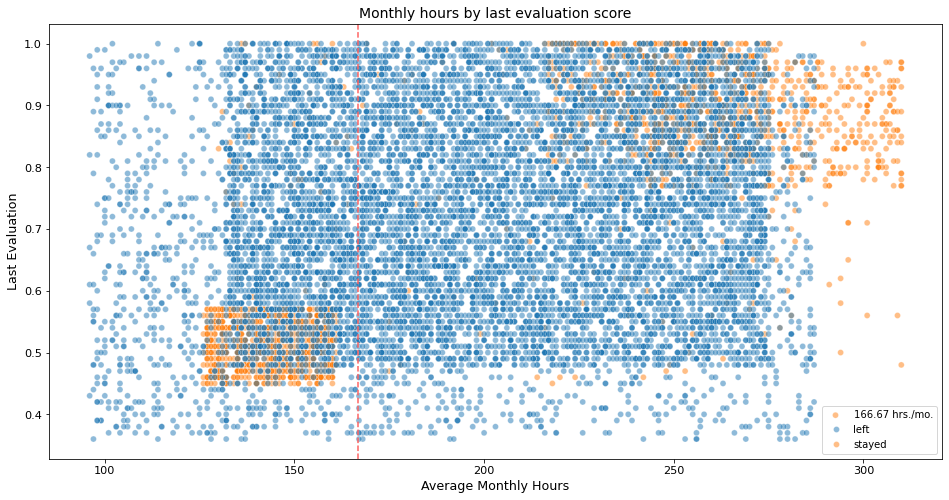

In [31]:
# Create a plot as needed
fs=14
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize=fs)
plt.xlabel('Average Monthly Hours', fontsize=fs*0.9)
plt.ylabel('Last Evaluation', fontsize=fs*0.9)
plt.tick_params(axis='both', which='major', labelsize=fs*0.8)
plt.tick_params(axis='both', which='minor', labelsize=fs*0.8)
plt.savefig('Figures/Monthly hours by last evaluation score.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

* High valuation employees with high working hours left the company.
* Low valuation employees with low working hours might have been fired.
* There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
* Most of the employees in this company work well over 167 hours per month.

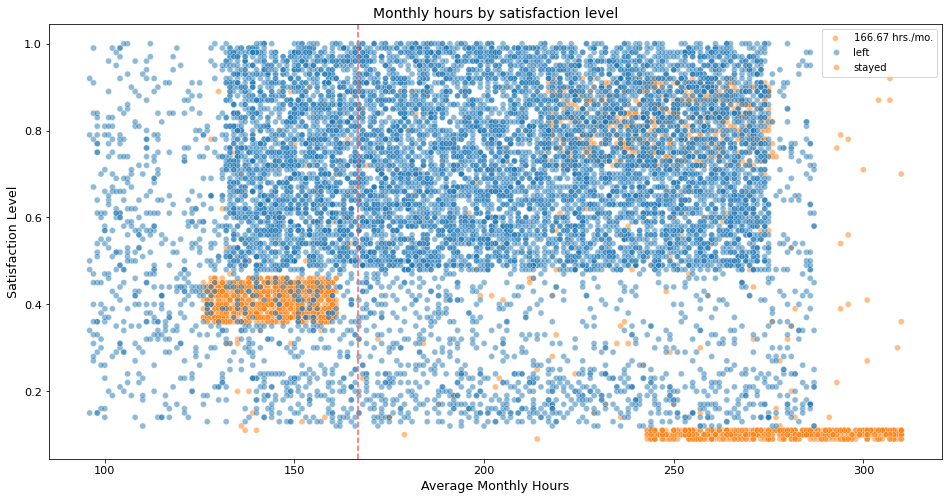

In [32]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
fs=14
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize=fs);
plt.xlabel('Average Monthly Hours', fontsize=fs*0.9)
plt.ylabel('Satisfaction Level', fontsize=fs*0.9)
plt.tick_params(axis='both', which='major', labelsize=fs*0.8)
plt.tick_params(axis='both', which='minor', labelsize=fs*0.8)
plt.savefig('Figures/Monthly hours by satisfaction level.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

* Employees that worked very high hours were unsatisfied and left the organization
* Few employees that were working for low hours, might not have contributed to many projects and were let go.

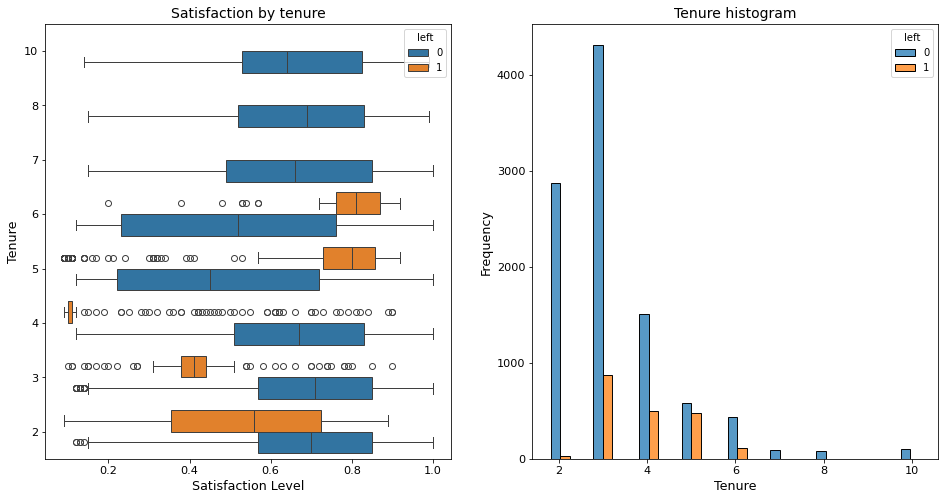

In [34]:
fs=14
# Create a plot as needed 
fig, axs = plt.subplots(1, 2, figsize = (16,8))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=axs[0])
axs[0].invert_yaxis()
axs[0].set_title('Satisfaction by tenure', fontsize=fs)
axs[0].set_xlabel('Satisfaction Level', fontsize=fs*0.9)
axs[0].set_ylabel('Tenure', fontsize=fs*0.9)
axs[0].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[0].tick_params(axis='both', which='minor', labelsize=fs*0.8)

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=axs[1])
axs[1].set_title('Tenure histogram', fontsize='14')
axs[1].set_xlabel('Tenure', fontsize=fs*0.9)
axs[1].set_ylabel('Frequency', fontsize=fs*0.9)
axs[1].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[1].tick_params(axis='both', which='minor', labelsize=fs*0.8)

plt.savefig('Figures/Tenure Distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

* Employees with 4 years tenure, left organization with lower satisfaction, might be due to changes in policies.
* Low tenured employees tend to leave with low satisfaction
* The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
* The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

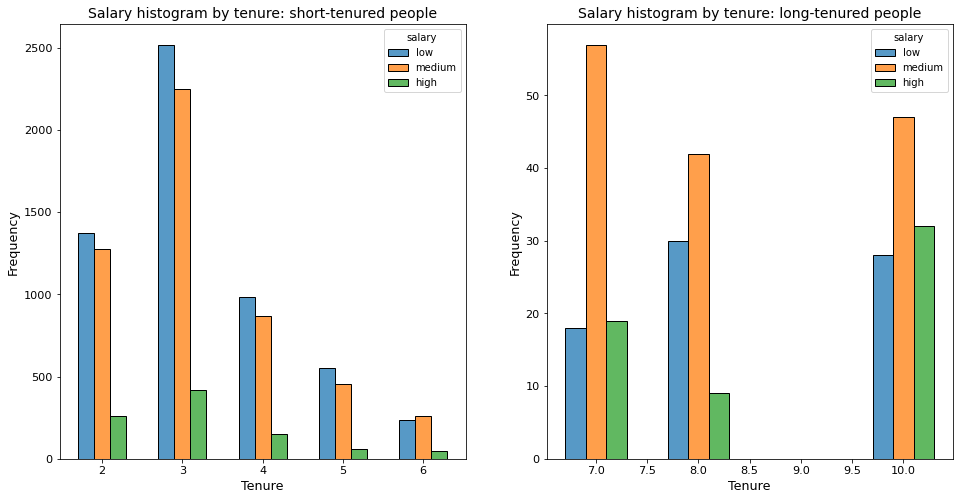

In [35]:
# Create a plot as needed 
fs = 14
fig, axs = plt.subplots(1, 2, figsize = (16,8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]


sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.6, ax=axs[0])
axs[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=fs)
axs[0].set_xlabel('Tenure', fontsize=fs*0.9)
axs[0].set_ylabel('Frequency', fontsize=fs*0.9)
axs[0].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[0].tick_params(axis='both', which='minor', labelsize=fs*0.8)

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.6, ax=axs[1])
axs[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=fs);
axs[1].set_xlabel('Tenure', fontsize=fs*0.9)
axs[1].set_ylabel('Frequency', fontsize=fs*0.9)
axs[1].tick_params(axis='both', which='major', labelsize=fs*0.8)
axs[1].tick_params(axis='both', which='minor', labelsize=fs*0.8)

plt.show()

There are few employees who are employeed for longer tenures but recieving less salary

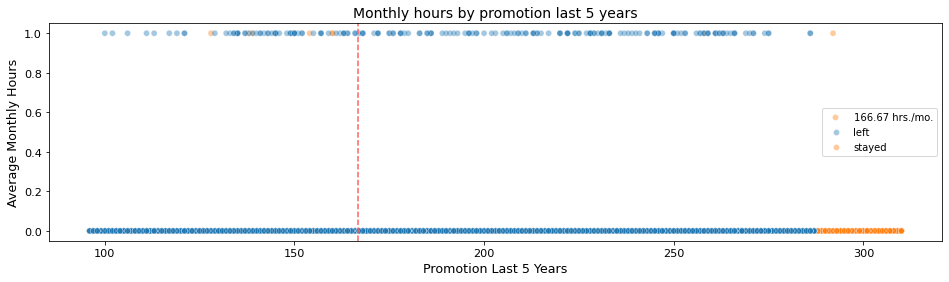

In [36]:
# Create a plot as needed
fs= 14
plt.figure(figsize=(16, 4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5_years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')

plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize=fs);
plt.xlabel('Promotion Last 5 Years', fontsize=fs*0.9)
plt.ylabel('Average Monthly Hours', fontsize=fs*0.9)
plt.tick_params(axis='both', which='major', labelsize=fs*0.8)
plt.tick_params(axis='both', which='minor', labelsize=fs*0.8)

plt.savefig('Figures/Monthly hours by promotion last 5 years.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

The plot above shows the following:

* Very few employees who were promoted in the last five years left
* Very few employees who worked the most hours were promoted
* Most of the employees who left were working the longest hours

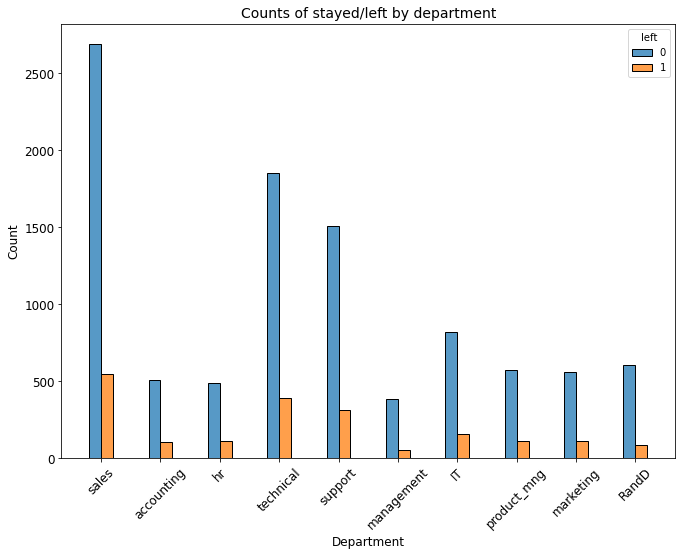

In [37]:
# Create a plot as needed
fs=12
plt.figure(figsize=(11,8))
ax = sns.histplot(data=df1, x= 'department',hue='left', multiple='dodge', discrete=1, hue_order=[0, 1], shrink=0.4)
plt.xlabel('Department', fontsize=fs)
plt.xticks(rotation=45, fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.yticks(fontsize=fs)

#plt.setp(ax.get_legend().get_texts(), fontsize=fs) # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize=fs) # for legend title

plt.title('Counts of stayed/left by department', fontsize=14);

plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

### Feature Engineering

In [41]:
df1['duration_per_project'] = df1['tenure']*12*df1['average_monthly_hours']/df1['number_of_project']
df1

C:\Users\nitin\AppData\Local\Temp\ipykernel_21380\1757961032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_per_project'] = df1['tenure']*12*df1['average_monthly_hours']/df1['number_of_project']


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary,duration_per_project
0,0.38,0.53,2,157,3,0,1,0,sales,low,2826.000000
1,0.80,0.86,5,262,6,0,1,0,sales,medium,3772.800000
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1865.142857
3,0.72,0.87,5,223,5,0,1,0,sales,low,2676.000000
4,0.37,0.52,2,159,3,0,1,0,sales,low,2862.000000
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,10360.000000
11996,0.74,0.95,5,266,10,0,0,1,management,high,6384.000000
11997,0.85,0.54,3,185,10,0,0,1,management,high,7400.000000
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,6880.000000


In [42]:
# Employees overworked or not
# 175 is the amount of hour an employee should work in a month taken by 8 hrs daily for 50 weeks
df1['overworked'] = (df1['average_monthly_hours']>175).astype(int)

C:\Users\nitin\AppData\Local\Temp\ipykernel_21380\3217946608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overworked'] = (df1['average_monthly_hours']>175).astype(int)


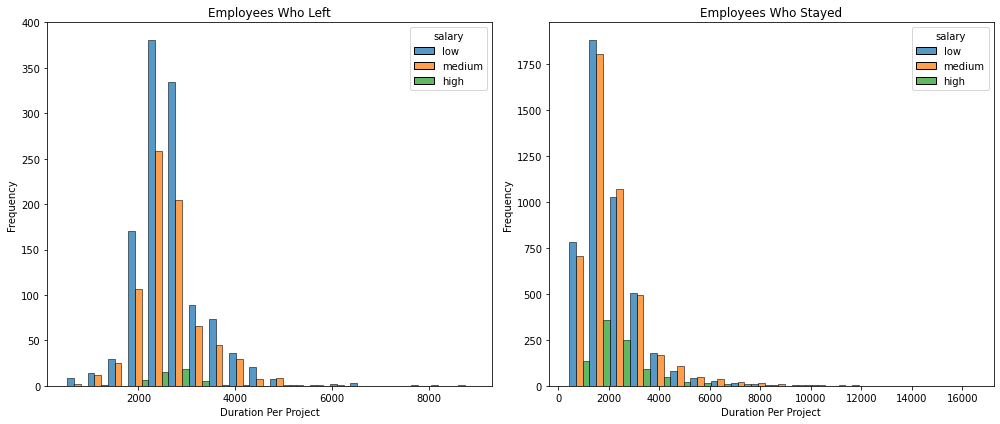

In [43]:
# Create a plot as needed
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df1[df1['left']==1], x='duration_per_project',hue='salary', multiple='dodge',bins=20, ax=axs[0])
axs[0].set_title('Employees Who Left')
axs[0].set_xlabel('Duration Per Project')
axs[0].set_ylabel('Frequency')

sns.histplot(data=df1[df1['left']==0], x='duration_per_project',hue='salary', multiple='dodge',bins=20, ax=axs[1])
axs[1].set_title('Employees Who Stayed')
axs[1].set_xlabel('Duration Per Project')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

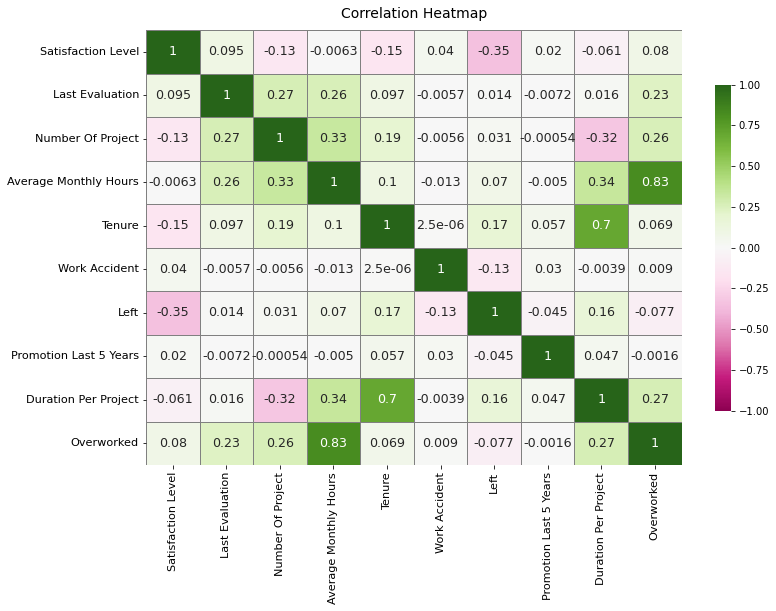

In [44]:
# Create a plot as needed 

colorMap = ['coolwarm','PiYG','RdBu','Spectral','crest','viridis','magma']

fs = 14
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": fs*0.9}, cmap=colorMap[1],linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.75})

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':fs}, pad=12)

# Modify y-tick labels
y_labels = [label.get_text().replace('_', ' ').title() for label in heatmap.get_yticklabels()]
heatmap.set_yticklabels(y_labels, rotation=0, fontsize=fs*0.8)
heatmap.set_xticklabels(y_labels, rotation=90, fontsize=fs*0.8)

plt.savefig('Figures/Correlation Heatmap.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### Insights

* Very less promotions
* Most employees leave after 3 years and almost all five year employees left
* Lowest satisfaction employees left the most
* Employees with high evaluation, low satisfaction, and high average monthly hours left

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Wheter or not employee will leave

### Identify the types of models most appropriate for this task.

Logistic or Tree Based

### Modeling

Convert the object type columns to one hot encoding or ordinal as required

In [45]:
df2=df1.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['salary'] = le.fit_transform(df1['salary'])

df2 = pd.get_dummies(df2,drop_first=True)
#df2.iloc[:,9:20] = df2.iloc[:,9:20].astype(int)

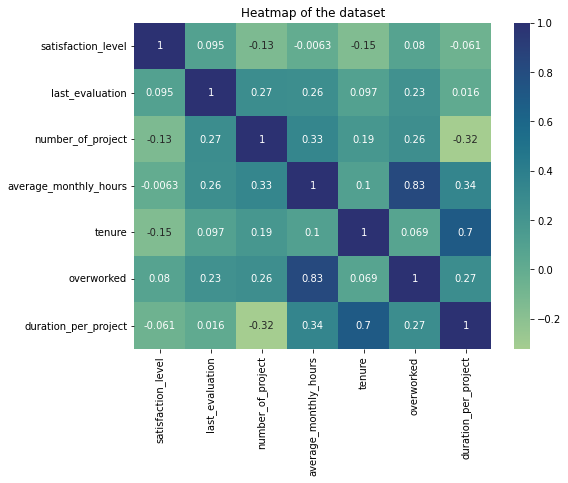

In [46]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(8, 6))
sns.heatmap(df2[['satisfaction_level', 'last_evaluation', 'number_of_project', 'average_monthly_hours', 'tenure','overworked','duration_per_project']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [47]:
# Determine the number of rows containing outliers
IQR = df2['tenure'].quantile(0.75)-df2['tenure'].quantile(0.25)
upper = df2['tenure'].quantile(0.75)+IQR*1.25
lower = df2['tenure'].quantile(0.25)-IQR*1.25
df3 = df2[(df2['tenure']<=upper)&(df2['tenure']>=lower)].reset_index(drop=True)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_of_project       11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5_years  11167 non-null  int64  
 8   salary                  11167 non-null  int32  
 9   duration_per_project    11167 non-null  float64
 10  overworked              11167 non-null  int32  
 11  department_RandD        11167 non-null  uint8  
 12  department_accounting   11167 non-null  uint8  
 13  department_hr           11167 non-null  uint8  
 14  department_management   11167 non-null

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,duration_per_project,overworked,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,2826.000000,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,1,0,2,1865.142857,1,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,1,0,1,2676.000000,1,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,2862.000000,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,2754.000000,0,0,0,0,0,0,0,1,0,0


## Create Models

* Remove one column from the pair of columns with high correlation
* Remove the target variable
* Scale features wherever required

In [107]:
y = df3['left'] #['Left' if i==1 else 'Not_left' for i in df3.left]
X = df3.drop(['left', 'satisfaction_level','average_monthly_hours','duration_per_project'],axis=1)

# These are for Tree based
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# These are for LR
X_max = df3.drop('left',axis=1)
X_max_train, X_max_test, y_max_train, y_max_test = train_test_split(X_max,y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_max)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,y, test_size=0.2, stratify=y, random_state=42)

### Logistic Regression

In [108]:
# Instantiate model
lr = LogisticRegression()

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
lr_GSCV = GridSearchCV(lr, cv_params, scoring=scoring, cv=5, refit='roc_auc', n_jobs = -1, verbose=4, error_score='raise')

In [109]:
%%time
# lr_GSCV.fit(X_scaled_train, y_scaled_train)
# pickle.dump(lr_GSCV, open('Pickle/lr_GSCV.pickle', 'wb'))
lr_GSCV = pickle.load(open('Pickle/lr_GSCV.pickle', 'rb'))

lr_opt = lr_GSCV.best_estimator_
print(lr_GSCV.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: total: 0 ns
Wall time: 1 ms


### Random Forest

In [110]:
# Instantiate model
rfc = RFC(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rfc_GSCV = GridSearchCV(rfc, cv_params, scoring=scoring, cv=5, refit='roc_auc', n_jobs = -1, verbose=4, error_score='raise')

In [111]:
%%time
# rfc_GSCV.fit(X_train, y_train)
# pickle.dump(rfc_GSCV, open('Pickle/rfc_GSCV.pickle', 'wb'))
rfc_GSCV = pickle.load(open('Pickle/rfc_GSCV.pickle', 'rb'))

rfc_opt = rfc_GSCV.best_estimator_
print(rfc_GSCV.best_params_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
CPU times: total: 15.6 ms
Wall time: 25.6 ms


### Gradient Boosting

In [112]:
xgb = XGB(objective = 'binary:logistic', random_state=42, )

cv_params = {'max_depth': [3,5,None],
              'min_child_weight': [2, 3],
              'learning_rate': [0.1, 0.3],
              'n_estimators': [100,300,500],
              'subsample': [0.75, 1],
              'colsample_bytree': [1.0]
              }

scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
xgb_GSCV = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit = 'roc_auc', n_jobs = -1, verbose=4, error_score='raise')

In [113]:
%%time
# xgb_GSCV.fit(X_train, y_train)
# pickle.dump(xgb_GSCV, open('Pickle/xgb_GSCV.pickle', 'wb'))
xgb_GSCV = pickle.load(open('Pickle/xgb_GSCV.pickle', 'rb'))

xgb_opt = xgb_GSCV.best_estimator_
print(xgb_GSCV.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1}
CPU times: total: 31.2 ms
Wall time: 849 ms


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Create Support Functions

In [114]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    
    table = pd.DataFrame(columns = ['Model', 'Precision', 'Recall', 'F1', 'Accuracy'])
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                     'recall': 'mean_test_recall',
                     'f1': 'mean_test_f1',
                     'accuracy': 'mean_test_accuracy',
                     }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    for i in range(len(model_name)):
        # Isolate the row of the df with the max(metric) score
        best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric[i]]].idxmax(), :]

        # Extract Accuracy, precision, recall, and f1 score from that row
        f1 = best_estimator_results.mean_test_f1
        recall = best_estimator_results.mean_test_recall
        precision = best_estimator_results.mean_test_precision
        accuracy = best_estimator_results.mean_test_accuracy

        # Create table of results
        table.loc[len(table)]={'Model': model_name[i],
                            'Precision': precision,
                            'Recall': recall,
                            'F1': f1,
                            'Accuracy': accuracy,
                            }

    return table

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    #auc_score = roc_auc_score(y_test, y_pred_xgb_proba)
    
    table = pd.DataFrame({'Model': [model_name],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1': [f1],
                        'Accuracy': [accuracy]
                        })

    return table

#### Logistic Regression Evaluation

In [115]:
out_lr = make_results(['LR_F1','LR_AC','LR_RC','LR_PC'], lr_GSCV, ['f1','accuracy','recall','precision'])

# X_scaled_test = X_max
# y_scaled_test = y

print(f'Classes are: {lr_opt.classes_}')
y_preds_lr =lr_opt.predict(X_scaled_test)
y_pred_lr_proba =lr_opt.predict_proba(X_scaled_test)[:,1]

results_lr = get_test_scores('LR Test', y_preds_lr,y_scaled_test)
results_lr = pd.concat([out_lr.iloc[0:1,:],results_lr],axis=0)
results_lr.iloc[0, 0] = 'LR CV'

auc_score_lr = roc_auc_score(y_scaled_test, y_pred_lr_proba)
print(f'ROC AUC Score of LR: {auc_score_lr:.4f}')

# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_scaled_test, y_preds_lr, target_names=target_names))

Classes are: [0 1]
ROC AUC Score of LR: 0.8928
                           precision    recall  f1-score   support

Predicted would not leave       0.88      0.93      0.91      1857
    Predicted would leave       0.54      0.39      0.45       377

                 accuracy                           0.84      2234
                macro avg       0.71      0.66      0.68      2234
             weighted avg       0.82      0.84      0.83      2234



#### Random Forest Evaluation

In [116]:
out_rfc = make_results(['RF_F1','RF_AC','RF_RC','RF_PC'], rfc_GSCV, ['f1','accuracy','recall','precision'])

print(f'Classes are: {rfc_opt.classes_}')
y_preds_rfc = rfc_opt.predict(X_test)
y_pred_rfc_proba = rfc_opt.predict_proba(X_test)[:,1]

results_rfc = get_test_scores('RF Test', y_preds_rfc,y_test)
results_rfc = pd.concat([out_rfc.iloc[0:1,:],results_rfc],axis=0)
results_rfc.iloc[0, 0] = 'RF CV'

auc_score_rfc = roc_auc_score(y_test, y_pred_rfc_proba)
print(f'ROC AUC Score of RF: {auc_score_rfc:.4f}')

# Create classification report for Random Forest model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds_rfc, target_names=target_names))

Classes are: [0 1]
ROC AUC Score of RF: 0.9684
                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      1857
    Predicted would leave       0.89      0.91      0.90       377

                 accuracy                           0.97      2234
                macro avg       0.93      0.94      0.94      2234
             weighted avg       0.97      0.97      0.97      2234



#### Gradient Boosting Evaluation

In [117]:
out_xgb = make_results(['GB_F1','GB_AC','GB_RC','GB_PC'], xgb_GSCV, ['f1','accuracy','recall','precision'])

print(f'Classes are: {xgb_opt.classes_}')
y_preds_xgb = xgb_opt.predict(X_test)
y_pred_xgb_proba = xgb_opt.predict_proba(X_test)[:,1]

results_xgb = get_test_scores('GB Test', y_preds_xgb,y_test)
results_xgb = pd.concat([out_xgb.iloc[0:1,:],results_xgb],axis=0)
results_xgb.iloc[0, 0] = 'GB CV'

auc_score_xgb = roc_auc_score(y_test, y_pred_xgb_proba)
print(f'ROC AUC Score of GB: {auc_score_xgb:.4f}')

# Create classification report for Gradient Boosting model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds_xgb, target_names=target_names))

Classes are: [0 1]
ROC AUC Score of GB: 0.9723
                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      1857
    Predicted would leave       0.91      0.90      0.91       377

                 accuracy                           0.97      2234
                macro avg       0.94      0.94      0.94      2234
             weighted avg       0.97      0.97      0.97      2234



In [118]:

out = pd.concat([out_xgb, out_rfc,out_lr], axis=0)
display(out)

results = pd.concat([results_xgb,results_rfc,results_lr],axis=0)
results.dfi.export('Figures/Evaluation Metrics.png',dpi=300)
results

,Model,Precision,Recall,F1,Accuracy
0,GB_F1,0.912381,0.899003,0.905592,0.968431
1,GB_AC,0.912381,0.899003,0.905592,0.968431
2,GB_RC,0.912381,0.899003,0.905592,0.968431
3,GB_PC,0.915643,0.893688,0.904469,0.968207
0,RF_F1,0.917268,0.896346,0.906575,0.968879
1,RF_AC,0.917230,0.896346,0.906574,0.968879
2,RF_RC,0.887265,0.904983,0.895848,0.964513
3,RF_PC,0.917268,0.896346,0.906575,0.968879
0,LR_F1,0.580065,0.366113,0.448827,0.848538
1,LR_AC,0.580065,0.366113,0.448827,0.848538


,Model,Precision,Recall,F1,Accuracy
0,GB CV,0.912381,0.899003,0.905592,0.968431
0,GB Test,0.909091,0.901857,0.905459,0.968218
0,RF CV,0.917268,0.896346,0.906575,0.968879
0,RF Test,0.888312,0.907162,0.897638,0.965085
0,LR CV,0.580065,0.366113,0.448827,0.848538
0,LR Test,0.540741,0.387268,0.451314,0.841092


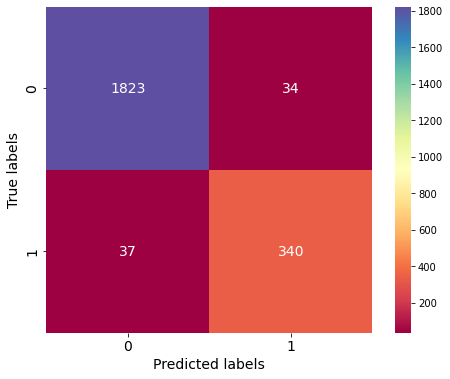

In [119]:
cm = confusion_matrix(y_test,y_preds_xgb)

# Create the display for your confusion matrix.
fontsize=14
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap="Spectral", annot_kws={"size": fontsize}, cbar=True, square=True)
plt.xlabel('Predicted labels', fontsize=fontsize)
plt.ylabel('True labels', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.savefig('Figures/Confusion Matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

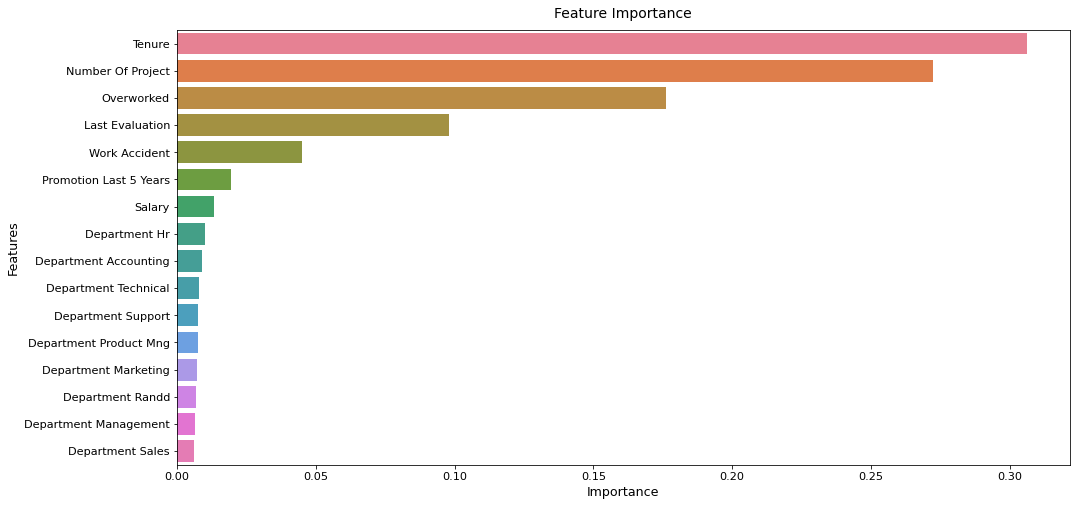

In [120]:
# Plot the relative feature importance of the predictor variables in your model.
importances = xgb_opt.feature_importances_
feature_names = [label.replace('_', ' ').title() for label in X.columns]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plotting using seaborn
palette = ["#fee090", "#fdae61", "#4575b4", "#313695", "#e0f3f8", "#abd9e9", "#d73027", "#a50026"]
fs=14
plt.figure(figsize=(16,8))
featureImportance = sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='husl',orient='h')

# Add labels and title
plt.title('Feature Importance',fontsize=fs,pad=12)
plt.xlabel('Importance',fontsize=fs*0.9)
plt.ylabel('Features',fontsize=fs*0.9)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.savefig('Figures/Feature Importance Plots.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

### SHAP Analysis

In [121]:
# New X for labeling column names
explainer = shap.Explainer(xgb_opt,X_train)
shap_values = explainer(X_test)
# you can save time by passing only subset of observations few rows
# shap_values = explainer(X[:100])

In [122]:
np.shape(shap_values.values)
# Same size as features X

(2234, 16)

### Waterfall Plot

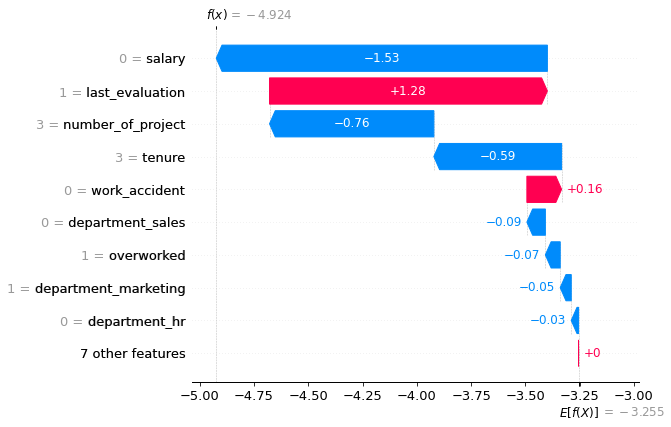

In [123]:
shap.plots.waterfall(shap_values[25])

In this plot
* E[f(X)] is average prediction for all observations
* f(x) is prediction for this observation
* SHAP values are values in between the plot
    > They tell us how each model feature has contributed to the difference between the prediction and average prediction.

In [124]:
X_test_temp = X_test.copy()
X_test_temp.columns = [label.replace('_', ' ').title() for label in X_test_temp.columns]

show = False
summ = shap.summary_plot(shap_values.values, X_test_temp, show=show)

if show == False:
    plt.savefig('Figures/Feature summary.png', format='png', dpi=300, bbox_inches='tight')    
    plt.close()

shap.dependence_plot("Number Of Project", shap_values.values, X_test_temp, show=show)
if show == False:
    plt.savefig('Figures/Feature Dependence.png', format='png', dpi=300, bbox_inches='tight')
    plt.close()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* Tenure might be a leading cause, as after five years most employees switch, might be gratuity or change of scenario.
* Also, employess with high last evaluation and high monthly hours left, they had low satisfaction.
* An excellent f1 score of 93.7% with stratification and 92.8 without stratification is obtained.
* In this scenario Employees company wants to identify employees who are unsastisfied, so a high recall would be great.
* This model shows a high recall of 92.56 %.
* And high ROC - AUC of 97.6%

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting feature engineering, the Gradient Boosting model achieved AUC of 97.37%, precision of 91.5%, recall of 89.3%, f1-score of 90.47%, and accuracy of 96.82%, on the test set.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

Next Steps

> It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

### Kmeans Model

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

data=[]
num_clusters = range(2,21)
for i in num_clusters:
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    # Fit the model
    km.fit(X_scaled)
    data.append((i, km.inertia_, silhouette_score(X_scaled, km.labels_)))
    
km_score = pd.DataFrame(data, columns = ['n_clusters','inertia','silhouette'])
km_score

,n_clusters,inertia,silhouette
0,2,165216.839516,0.059983
1,3,151763.838492,0.105028
2,4,139863.980817,0.140683
3,5,128037.811938,0.190029
4,6,116677.665115,0.212319
5,7,104955.567474,0.257561
6,8,93358.938239,0.278410
7,9,81573.463529,0.311935
8,10,77084.800393,0.276638
9,11,67873.197385,0.286861


Text(0, 0.5, 'Inertia')

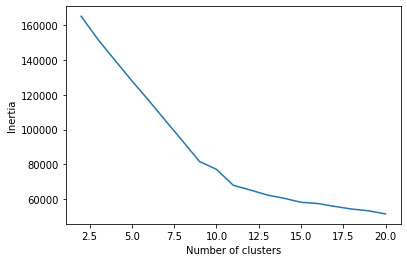

In [130]:
plot = sns.lineplot(x=num_clusters, y=km_score.inertia)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")
plt.show()

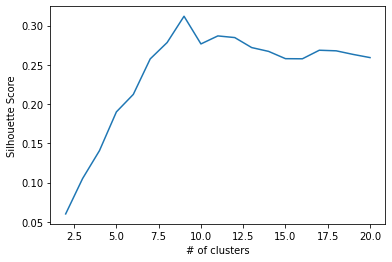

In [132]:
plot = sns.lineplot(x=num_clusters, y=km_score.silhouette)
plot.set_xlabel("# of clusters")
plot.set_ylabel("Silhouette Score")
plt.show()

In [133]:
n_opt = 10
kmeans_opt = KMeans(n_clusters=n_opt, random_state=42)
kmeans_opt.fit(X_scaled)
X['cluster'] = kmeans_opt.labels_

# X_new = pd.concat([X,df1[['satisfaction_level','department','left']]],axis=1)
X.head()

c:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,last_evaluation,number_of_project,tenure,work_accident,promotion_last_5_years,salary,overworked,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
0,0.53,2,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5
1,0.88,7,4,0,0,2,1,0,0,0,0,0,0,1,0,0,0
2,0.87,5,5,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,0.52,2,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5
4,0.50,2,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5


In [134]:
X[X.cluster==9].head(30)

,last_evaluation,number_of_project,tenure,work_accident,promotion_last_5_years,salary,overworked,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
62,0.54,2,3,0,0,2,0,0,0,0,0,0,1,0,0,0,9
63,0.86,5,5,1,0,2,1,0,0,0,0,0,1,0,0,0,9
64,0.50,2,3,0,0,2,0,0,0,0,0,0,1,0,0,0,9
66,0.77,5,4,0,0,2,1,0,0,0,0,0,1,0,0,0,9
67,0.49,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,9
68,0.87,7,4,0,0,1,1,0,0,0,0,0,1,0,0,0,9
69,0.97,6,4,0,0,2,1,0,0,0,0,0,1,0,0,0,9
70,0.79,7,4,0,0,2,1,0,0,0,0,0,1,0,0,0,9
71,0.83,6,4,0,0,2,1,0,0,0,0,0,1,0,0,0,9
135,0.47,2,3,0,0,1,0,0,0,0,0,0,1,0,0,0,9
